In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


<h1><b><center>CLASIFICACIÓN DE NORMALIDAD EN TEJIDO DE MAMAS A PARTIR DE IMÁGENES DIGITALES DE RAYOS X</center></h1> 

|<h2><font color='white'>-----------------------</font><b>DIEGO FERNANDO VELASCO GIRALDO||
|---|---|
|||
|||
| <left><font size="4">Estudiante de Maestría en Ingeniería con Énfasis en Ingeniería Electrónica</font> | <center><img src="https://drive.google.com/uc?id=1CtdK5Litx2pQmTGD3U2Qs0MxIVs_nB8H" width="55" height="80" /> |
|||    
| <left><font size="4">Grupo de Investigación Percepción y Sistemas Inteligentes - Univalle</font> | <center><img src="https://drive.google.com/uc?id=1qEQd1k3SOIeLx-X0OSYQ0DosajsIy9Vc" width="165" height="70" /> |
|||
| <left><i><font size="4">Correo Electrónico: diego.fernando.velasco@correounivalle.edu.co</font></i> | <center><i><font size="4">Celular: 3234777477</font></i> |
|||
    
    
<br>
<br>
<center><h4><i>Proyecto de Grado - Modalidad: Profundización - Universidad del Valle - Director: Humberto Loaiza, Ph.D.</i></h4>
<br>

In [ ]:
# import the necessary packages
import matplotlib
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import argparse
import cv2
import glob
from pandas import DataFrame
import sklearn
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Data preparation / Preprocessing

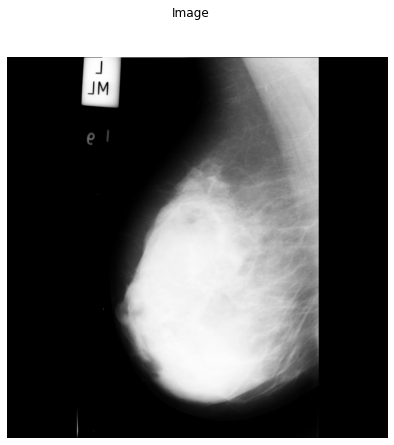

In [ ]:
def getMammogramsHist(image):
    features = []
    hist = cv2.calcHist([image],[0],None,[251],[5,256])  
    #features.extend(hist)
    features = hist
    return features

#ruta_AbnormalProcessedNOHISTEQ = "/content/drive/MyDrive/Implementación Proyecto Grado Maestría/minimiasdivididoProcessed/minimiasdivididoProcessedNOHISTEQ_DFV/Abnormal_ProcessNOHISTEQ"

ruta_Abnormal = "/content/drive/MyDrive/Implementación Proyecto Grado Maestría/minimiasdividido/Abnormal"


# load the image and show it
#image = cv2.imread(ruta_AbnormalProcessedNOHISTEQ+"/mdb025_output.png", 0)#img = cv.imread('messi5.jpg')
image = cv2.imread(ruta_Abnormal+"/mdb171.pgm", 0)#img = cv.imread('messi5.jpg')
assert(image is not None), "image no existe, compruebe la ruta"
#image = cv2.imread("minimiasdividido/Abnormal/mdb015.pgm", 0)#img = cv.imread('messi5.jpg')
#image = cv2.imread("minimiasdivididoProcessed/minimiasdivididoProcessedNOHISTEQ_DFV/Normal_ProcessNOHISTEQ/mdb238_output.png", 0)

# image2 = equalizeImage(image, False);

#im_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

#Plot side by side the original and equalized image
#fig, axs = plt.subplots(2, 3, figsize=(9, 9), sharey=True)
fig, (ax1) = plt.subplots(1, 1, figsize=(7,7))
fig.suptitle('Image')
# Show image
plt.imshow(image, cmap='gray'), plt.axis("off")
plt.show()

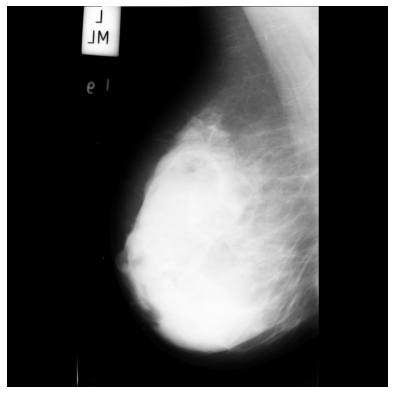

In [ ]:
#Noise removal 
image = cv2.GaussianBlur(image, (1, 1), 0)
fig, (ax1) = plt.subplots(1, 1, figsize=(7,7))
plt.imshow(image, cmap='gray'), plt.axis("off")
plt.show()

(5.0, 256.0)

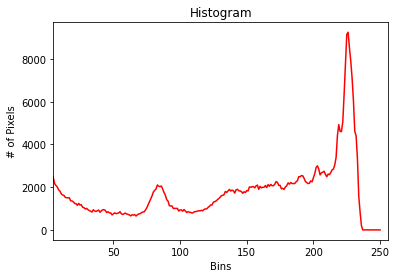

In [ ]:
hist = cv2.calcHist([image],[0],None,[251],[5,256])  

plt.figure()
plt.title("Histogram")
plt.xlabel("Bins")
plt.ylabel("# of Pixels")
plt.plot(hist, color = "r")
plt.xlim([5, 256])

Data Type of Equalized Image:  uint8


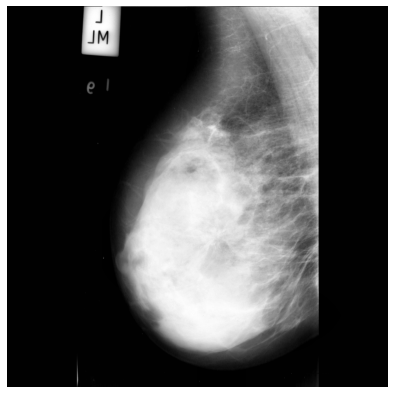

(1024, 1024)


In [ ]:
#Improve contrast #OJO, PROBAR CLASIFICACIÓN CON AMBOS
#image_equalized = cv2.equalizeHist(image)
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8)) 
image_equalized = clahe.apply(image)
print("Data Type of Equalized Image: ", image_equalized.dtype)

fig, (ax1) = plt.subplots(1, 1, figsize=(7,7))
plt.imshow(image_equalized, cmap='gray'), plt.axis("off")

plt.show()

print( image_equalized.shape )

(5.0, 256.0)

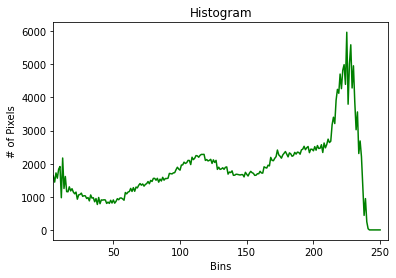

In [ ]:
hist = cv2.calcHist([image_equalized],[0],None,[251],[5,256])  

plt.figure()
plt.title("Histogram")
plt.xlabel("Bins")
plt.ylabel("# of Pixels")
plt.plot(hist, color = "g")
plt.xlim([5, 256])

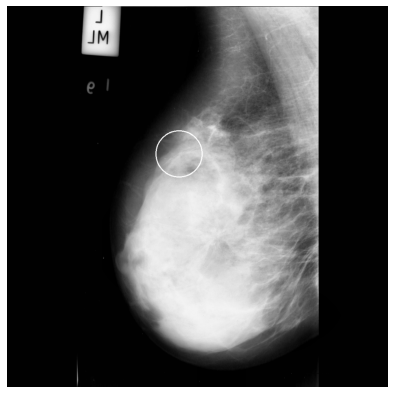

(1024, 1024)


In [ ]:
#mdb025 F CIRC B 674 443 79
#mdb231 F CALC M 603 538 44
#mdb171 D ARCH M 462 627 62

# Line thickness of 2 px 
thickness = 2

# Red color in BGR
color = (255, 255, 255)

# Center coordinates
x_coordinate = 462
y_coordinate = 627
y_coordinate = 1024-y_coordinate
center_coordinates = (x_coordinate, y_coordinate)

# Radius of circle
radius = 62
  
# Using cv2.circle() method
# Draw a circle of red color of thickness -1 px
marked_image = cv2.circle(image_equalized, center_coordinates, radius, color, thickness)

fig, (ax1) = plt.subplots(1, 1, figsize=(7,7))
plt.imshow(marked_image, cmap='gray'), plt.axis("off")

plt.show()

print( image_equalized.shape )



In [ ]:
# #laplacian = cv2.Laplacian(closing,cv2.CV_64F)
# #sobelx = cv2.Sobel(image_equalized,cv2.CV_64F,1,0,ksize=5)
# # sobely = cv2.Sobel(image,cv2.CV_64F,0,1,ksize=5)

# # Apply gradient filtering
# sobel_x = cv2.Sobel(image_equalized, cv2.CV_64F, dx = 1, dy = 0, ksize = 5)
# sobel_y = cv2.Sobel(image_equalized, cv2.CV_64F, dx = 0, dy = 1, ksize = 5)
# sobel_xy = cv2.addWeighted(src1=sobel_x, alpha=0.5, src2=sobel_y,
#                           beta=0.5, gamma=0)
# sobel_xy = cv2.normalize(src=sobel_xy, dst=None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8U)
# print("Data Type of Sobel XY Image: ", sobel_xy.dtype)
# fig, (ax1) = plt.subplots(1, 1, figsize=(7,7))
# plt.imshow(sobel_xy, cmap='gray'), plt.axis("off")
# plt.show()

In [ ]:
# max_pixVal = np.amax(image)
# print(max_pixVal)
# _, thresImage0 = cv2.threshold(image, max_pixVal*0.1, max_pixVal, cv2.THRESH_BINARY)
# kernel = np.ones((20,20),np.uint8)
# erosion = cv2.erode(thresImage0,kernel,iterations = 1)
# fig, (ax1) = plt.subplots(1, 1, figsize=(7,7))
# plt.imshow(erosion, cmap='gray'), plt.axis("off")
# plt.show()

In [ ]:
# sobel_xy_no_border = cv2.bitwise_and(sobel_xy, sobel_xy, mask=erosion)
# fig, (ax1) = plt.subplots(1, 1, figsize=(7,7))
# plt.imshow(sobel_xy_no_border, cmap='gray'), plt.axis("off")
# plt.show()

In [ ]:
# #print("Data Type of thresImage2: ", blended.dtype)

# max_pixVal = np.amax(sobel_xy)
# print(max_pixVal)

# _, thresImage = cv2.threshold(sobel_xy, max_pixVal*0.2, max_pixVal, cv2.THRESH_BINARY_INV)
# #_, thresImage = cv2.threshold(sobel_xy, 110, 255, cv2.THRESH_TRUNC)
# #thresImage = cv2.adaptiveThreshold(sobel_xy, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11,2)
# kernel = np.ones((20,20),np.uint8)
# closing = cv2.morphologyEx(thresImage, cv2.MORPH_CLOSE, kernel)
# # kernel = np.ones((5,5),np.uint8)
# # opening = cv2.morphologyEx(closing, cv2.MORPH_OPEN, kernel)

# #thresImage = cv2.bitwise_not(thresImage)
# fig, (ax1) = plt.subplots(1, 1, figsize=(7,7))
# plt.imshow(thresImage, cmap='gray'), plt.axis("off")
# plt.show()

In [ ]:
# #Detect Biggest Area
# new_img = np.zeros_like(closing_neg)                                        # step 1
# for val in np.unique(closing_neg)[1:]:                                      # step 2
#     mask = np.uint8(closing_neg == val)                                     # step 3
#     labels, stats = cv2.connectedComponentsWithStats(mask, 4)[1:3]      # step 4
#     largest_label = 1 + np.argmax(stats[1:, cv2.CC_STAT_AREA])          # step 5
#     new_img[labels == largest_label] = val                              # step 6
    
# #ROI_1 = cv2.bitwise_and(image, image, mask=closing)
    
    
# plt.imshow(new_img, cmap='gray'), plt.axis("off")
# plt.show()

In [ ]:
# hist = getMammogramsHist(sobel_xy_no_border)
# plt.plot(hist, color = "b")

In [ ]:
# from skimage.feature import local_binary_pattern

# # settings for LBP

# METHOD = 'default'
# radius = 3
# n_points = 6 * radius
# matplotlib.rcParams['font.size'] = 9


# lbp = local_binary_pattern(sobel_xy_no_border, n_points, radius, METHOD)
# lbp = np.array(lbp, dtype=np.uint8)


# fig, ax = plt.subplots(figsize=(14,14))

# plt.subplot(1,2,1).set_title('LBP')
# image_neg = cv2.bitwise_not(lbp)
# plt.imshow(image_neg, cmap='gray') 


# plt.subplot(1,2,2).set_title('Hist')
# hist = getMammogramsHist(image_neg)
# plt.plot(hist, color = "b")


# plt.show()

In [ ]:
# #Source: Instruments & Data Tools
# #Inspired from the Vector Quantization Example

# from sklearn import cluster
# from skimage import data

# def km_clust(array, n_clusters):
    
#     # Create a line array, the lazy way
#     X = array.reshape((-1, 1))
#     # Define the k-means clustering problem
#     k_m = cluster.KMeans(n_clusters=n_clusters, n_init=4)
#     # Solve the k-means clustering problem
#     k_m.fit(X)

#     # Get the coordinates of the clusters centres as a 1D array
#     values = k_m.cluster_centers_.squeeze()

#     # Get the label of each point
#     labels = k_m.labels_

#     return(values, labels)

# # Read the data as greyscale 
# ###img = data.imread('roo.jpg',as_grey=True)
# img = image_neg

# # Group similar grey levels using 8 clusters
# values, labels = km_clust(img, n_clusters = 2)

# # Create the segmented array from labels and values
# img_segm = np.choose(labels, values)
# # Reshape the array as the original image
# img_segm.shape = img.shape

# # Get the values of min and max intensity in the original image
# vmin = img.min()
# vmax = img.max()

# fig = plt.figure(1)
# # Plot the original image
# ax1 = fig.add_subplot(1,2,1)
# ax1.imshow(img,cmap=plt.cm.gray, vmin=vmin, vmax=vmax)
# ax1.set_title('Original image')

# # Plot the simplified color image
# ax2 = fig.add_subplot(1,2,2)
# ax2.imshow(img_segm, cmap=plt.cm.gray, vmin=vmin, vmax=vmax)
# ax2.set_title('Simplified levels')

# # Get rid of the tick labels
# ax1.set_xticklabels([])
# ax1.set_yticklabels([])
# ax2.set_xticklabels([])
# ax2.set_yticklabels([])

# plt.show()

In [ ]:
#from scipy.stats import mean
from scipy.stats import skew
from scipy.stats import kurtosis
from scipy.stats import entropy

print('mean: ',np.mean(hist))
print('standard deviation: ',np.std(hist))
print('skewness: ',skew(hist))
print('kurtosis: ',kurtosis(hist))
print('entropy: ',entropy(hist))

# import skimage    
# entropy2 = skimage.measure.shannon_entropy(sobel_xy_no_border)
# print(entropy2)

hist.shape

mean:  2641.259
standard deviation:  2917.5137
skewness:  [1.8003893]
kurtosis:  [4.6867456]
entropy:  [4.9887924]


(251, 1)

# Create the dataset of features

Read all the images and calculate the features

In [ ]:
#path = 'data2/minimiasdivididoProcessed_DFV'
path = 'minimiasdivididoProcessed/minimiasdivididoProcessedNOHISTEQ_DFV'
nbinxchanel = 251
df = DataFrame(columns=list(range(0, nbinxchanel + 1)) )
index = 0
entropys = []
for f in glob.glob(path + "**/*/*", recursive=True):
    #print(index, " " ,f)
    image = cv2.imread(f,0)
    #Noise removal 
    image = cv2.GaussianBlur(image, (1, 1), 0)
    #Improve contrast
    #image_equalized = cv2.equalizeHist(image)
#     lbp = local_binary_pattern(image, n_points, radius, METHOD)
#     lbp = np.array(lbp, dtype=np.uint8)
#     image_neg = cv2.bitwise_not(lbp)
    
#     thresImage = cv2.adaptiveThreshold(image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)
#     kernel = np.ones((9,9),np.uint8)
#     opening = cv2.morphologyEx(thresImage, cv2.MORPH_OPEN, kernel)
#     kernel = np.ones((20,20),np.uint8)
#     closing = cv2.morphologyEx(opening, cv2.MORPH_CLOSE, kernel)
#     ROI = cv2.bitwise_and(image, image, mask=closing)

#     #max_pixVal = np.amax(image)
#     #_, thresImage = cv2.threshold(image, max_pixVal*0.80, max_pixVal, cv2.THRESH_BINARY)
#     thresImage = cv2.adaptiveThreshold(image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)
#     kernel = np.ones((9,9),np.uint8)
#     opening = cv2.morphologyEx(thresImage, cv2.MORPH_OPEN, kernel)
#     kernel = np.ones((20,20),np.uint8)
#     closing = cv2.morphologyEx(opening, cv2.MORPH_CLOSE, kernel)

    #Noise removal 
    image = cv2.GaussianBlur(image, (1, 1), 0)
    
    #Improve contrast #OJO, PROBAR CLASIFICACIÓN CON AMBOS
    #image_equalized = cv2.equalizeHist(image)
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8)) 
    image_equalized = clahe.apply(image)
    
    max_pixVal = np.amax(image)
    _, thresImage0 = cv2.threshold(image, max_pixVal*0.1, max_pixVal, cv2.THRESH_BINARY)
    kernel = np.ones((20,20),np.uint8)
    erosion = cv2.erode(thresImage0,kernel,iterations = 1)
    # Apply gradient filtering
#     sobel_x = cv2.Sobel(image_equalized, cv2.CV_64F, dx = 1, dy = 0, ksize = 5)
#     sobel_y = cv2.Sobel(image_equalized, cv2.CV_64F, dx = 0, dy = 1, ksize = 5)
#     sobel_xy = cv2.addWeighted(src1=sobel_x, alpha=0.5, src2=sobel_y,
#                                beta=0.5, gamma=0)
#     sobel_xy = cv2.normalize(src=sobel_xy, dst=None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8U)
    
    sobel_xy_no_border = cv2.bitwise_and(image_equalized, image_equalized, mask=erosion)
#     entropy = skimage.measure.shannon_entropy(sobel_xy_no_border)
#     entropys.append(entropy)
    
    features = np.array(getMammogramsHist(sobel_xy_no_border))[:,0]
    #features = np.array(getMammogramsHist(image))[:,0]
    label = int(0) #'Abnormal'
    if 'Normal' in f:
        label = int(1)         # Abnormal = 0      Normal = 1
    df.loc[index] = np.append(features, label)
    index += 1

# Lets change the last column name by something we can undestand. Let's call it the class
df.rename(columns={nbinxchanel: 'Target'}, inplace=True)

#Let's print the size of the generated dataframe
print ("Data size: ", df.shape)


Data size:  (0, 252)


In [ ]:
# print('features: ',features)
# print('label: ',label)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,Target


In [ ]:
#Sort data by label value:
# Data = Data.sort_values(by='Target')

#Split by class:
Abnormal = df[df.Target==0]
Normal = df[df.Target==1]

#Split features and labels:
Label = df.Target
Features = df.drop('Target',axis=1)
Features.head()
# feature_rows = Features.index 

# display(Abnormal.head())
# display(Normal.head())
# display(Features.head())
# display(Label.head())
# display(df.head())

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250


In [ ]:
# pd.to_numeric(Features, downcast='integer')

Features = Features.astype(float)

mean = Features.mean(axis=1)
std = Features.std(axis=1)
skew = Features.skew(axis = 1, skipna = True) 
kurtosis = Features.kurtosis(axis = 1, skipna = True) 

# display(mean.head())
# display(std.head())
# display(skew.head())
# display(kurtosis.head())
# display(entropy.head())

# Features.head(30)

Data2 = pd.concat([mean, std, skew, kurtosis], axis=1) 
Data2.columns = ['mean', 'std', 'skew', 'kurtosis']
print("Data2 shape:    ",Data2.shape)
Data2.head()


Data2 shape:     (0, 4)


,mean,std,skew,kurtosis


In [ ]:
# Data2['entropy'] = entropys 
# Data2.head()

## DF = pd.DataFrame(entropys, columns = ['entropy']) 
## print("DF shape:    ",DF.shape)

# PCA to display the data

In [ ]:
# from sklearn.preprocessing import StandardScaler
# from sklearn.decomposition import PCA

# features = list(range(0,250))
# # features.extend(list(range(nbinxchanel * 2, nbinxchanel )))
# # Separating out the features
# x = df.loc[:, features].values
# # Separating out the target
# y = df.loc[:,['class']].values
# # Standardizing the features
# x = StandardScaler().fit_transform(x)

# pca = PCA(n_components = 5)
# principalComponents = pca.fit_transform(x)
# principalDf = pd.DataFrame(data = principalComponents, columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5'])

# finalDf = pd.concat([principalDf, df[['class']]], axis = 1)

# fig = plt.figure(figsize = (8,8))
# ax = fig.add_subplot(1,1,1) 
# ax.set_xlabel('Principal Component 1', fontsize = 15)
# ax.set_ylabel('Principal Component 2', fontsize = 15)
# ax.set_title('2 component PCA', fontsize = 20)
# targets = ['Abnormal', 'Normal']
# colors = ['r', 'g']
# dims = ['PC4', 'PC5']

# for target, color in zip(targets,colors):
#     indicesToKeep = finalDf['class'] == target
#     ax.scatter(finalDf.loc[indicesToKeep, dims[0]]
#                , finalDf.loc[indicesToKeep, dims[1]]
#                , c = color
#                , s = 50)
# ax.legend(targets)
# ax.grid()

# pcx = finalDf.loc[:, dims[0]]
# pcy = finalDf.loc[:, dims[1]]

##for i, txt in enumerate(range(0, (x.shape)[0])):
##    ax.annotate(txt, (pcx[i], pcy[i]))



# Training and Test Split

In [ ]:
from sklearn.model_selection import train_test_split

# Create a new array with the added features: features_two
# train =  finalDf
# features = train[["PC1", "PC2", "PC3", "PC4", "PC5"]].values
# target = train["class"].values

features = Data2
#features = Features
target = Label

# Split the data into train and test
trainX, testX, trainY, testY = train_test_split(features, target, test_size = 0.2)
print(trainX.shape, trainY.shape)
print(testX.shape, testY.shape)

ValueError: ignored

# Neural network

In [ ]:
from sklearn.neural_network import MLPClassifier
import sklearn.neural_network
from sklearn.preprocessing import StandardScaler

# NN is sensitive to data scale, so we must normalize
scaler = StandardScaler()  
trainXX = trainX.copy()
testXX = testX.copy()
# Don't cheat - fit only on training data
scaler.fit(trainX)  
trainXX = scaler.transform(trainXX)  
# apply same transformation to test data
testXX = scaler.transform(testXX)  

model3 = MLPClassifier(solver='lbfgs', alpha=1e-3, activation = 'logistic', max_iter=7000,
                     hidden_layer_sizes = (4, 10), verbose = True, learning_rate = 'adaptive')


#solver='lbfgs' 'sgd' 'adam'
model3.fit(trainXX, trainY)                         

#Print the score on the train data
print("On training")
print(model3.score(trainXX, trainY))
print(confusion_matrix(model3.predict(trainXX), trainY))

#Print the score on the test data
print("\nOn test")
print(model3.score(testXX, testY))
print(confusion_matrix(model3.predict(testXX), testY))

y_pred = model3.predict(testXX)

In [ ]:
#@title Save models with pickles
# # Save The Model as a ‘Pickle’
# # A ‘pickle‘ file is a way that python can save a data structure to a file (similar to how you might save your progress in a computer game).
# # Sci-kit learn has its own functions for pickling using joblib which is typically faster when saving larger files.

# # Esta dio alto (73.913%) con CLAHE - sobelxy - sobelxy

# import joblib

# # Save a pickle file for the model
# #joblib.dump(clf_loaded, 'nn80percent.pkl')
# #joblib.dump(model3, 'nn63percent.pkl') 
# #joblib.dump(model3, 'nn63percentOnlyCLAHE.pkl') 

# #joblib.dump(model3, 'nn56percent.pkl') #With binary Targets and entropy
# #joblib.dump(clf_loaded, 'nn80434percent.pkl') #With binary Targets
# #joblib.dump(clf_loaded, 'nn8695percent.pkl') #With binary Targets
# #joblib.dump(clf_loaded, 'nn9130percent.pkl') #With binary Targets

# # Save the data
# # np.savetxt('trainXXFor913NN.dat', trainXX) #With this data I obtained #91.3
# # np.savetxt('testXXFor913NN.dat', testXX) #With this data I obtained #91.3
# # np.savetxt('trainYFor913NN.dat', trainY) #With this data I obtained #91.3
# # np.savetxt('testYFor913NN.dat', testY) #With this data I obtained #91.3


# # Load the pickle file
# clf_loaded = joblib.load('nn9130percent.pkl') 
# y_pred = clf_loaded.predict(testXX)
# # Check that the loaded model is the same as the original
# #assert model3.score(testXX, testY) == clf_load.score(testXX, testY)

# print(clf_loaded.score(testXX, testY))
# print(confusion_matrix(y_pred, testY))

# import sklearn.metrics as metrics
# #from sklearn.metrics import roc_curve, auc#, plot_roc_curve
# false_positive_rate, true_positive_rate, thresholds = metrics.roc_curve(testY, y_pred)

# roc_auc = metrics.auc(false_positive_rate, true_positive_rate)
# print("ROC AUC: ", roc_auc)



# #    y_pred = dt.predict(x_test)
# #    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
# #    roc_auc = auc(false_positive_rate, true_positive_rate)

In [ ]:
import sklearn.metrics as metrics
##from sklearn.metrics import roc_curve, auc#, plot_roc_curve
#false_positive_rate, true_positive_rate, thresholds = metrics.roc_curve(testY, y_pred)
false_positive_rate, true_positive_rate, thresholds = metrics.roc_curve(testY, y_pred)

roc_auc = metrics.auc(false_positive_rate, true_positive_rate)
print("ROC AUC: ", roc_auc)


import pylab as pl
# Plot ROC curve
pl.clf()
pl.plot(false_positive_rate, true_positive_rate, label='ROC curve (area = %0.2f)' % roc_auc)
pl.plot([0, 1], [0, 1], 'k--')
pl.xlim([0.0, 1.0])
pl.ylim([0.0, 1.0])
pl.xlabel('False Positive Rate')
pl.ylabel('True Positive Rate')
pl.title('Receiver operating characteristic example')
pl.legend(loc="lower right")
pl.show()

# Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

model2 = gnb.fit(trainX, trainY)

#Print the score on the train data
print("On training")
print(model2.score(trainX, trainY))
print(confusion_matrix(model2.predict(trainX), trainY))

#Print the score on the test data
print("\nOn test")
print(model2.score(testX, testY))
print(confusion_matrix(model2.predict(testX), testY))

# Show the confusion matrix


# Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_graphviz

clf = DecisionTreeClassifier(criterion='entropy', max_depth = 1, splitter='best').fit(trainX, trainY) #max_features='sqrt', 

y_out = clf.predict(testX) #Predict class or regression value for X.

#import graphviz
from graphviz import Source
import pydotplus


false_positive_rate, true_positive_rate, thresholds = metrics.roc_curve(testY, y_pred)


feature_columns = features.columns
dot_data = export_graphviz(clf,
                            feature_names=feature_columns,
                            out_file=None,
                            filled=True,
                            rounded=True)

pydot_graph = pydotplus.graph_from_dot_data(dot_data)
pydot_graph.write_png('original_tree.png')
pydot_graph.set_size('"3,6!"')

gvz_graph = Source(pydot_graph.to_string())

display(gvz_graph)

In [ ]:
#DECISION TREE PERFORMANCE EVALUATION

cm = confusion_matrix(testY, y_out) #(y_true, y_pred)
print("Confusion Matrix:\n",cm)

Score = clf.score(testX, testY)
print("Accuracy Score: ",Score)
#Other option: print("Accuracy: ",metrics.accuracy_score(y_test, y_out))

print("Max Depth of the Tree: ",clf.max_depth)

In [ ]:
#FEATURES IMPORTANCE IN DECISION TREE

plt.figure(figsize=(3, 3))
caract=features.shape[1]
print('Number of Features: ',caract)
plt.barh(range(caract),clf.feature_importances_)
plt.yticks(np.arange(caract), (feature_columns))
plt.xlabel('Features Importance')
plt.ylabel('Features')

plt.show()

# SVM

In [ ]:
# from sklearn.svm import SVC
# svclassifier = SVC(kernel='linear')
# svclassifier.fit(trainX, trainY)

# #y_pred = svclassifier.predict(testX)

# from sklearn.metrics import classification_report, confusion_matrix
# print(svclassifier.score(testX, testY))
# #print(confusion_matrix(y_pred,testY))
# print(confusion_matrix(svclassifier.predict(testX), testY))
# #print(classification_report(testY,y_pred))

In [ ]:
# #Dio alto con todo el histograma
# #joblib.dump(svclassifier, 'svm608percent.pkl')
# clf_loaded = joblib.load('svm608percent.pkl') 

# # Check that the loaded model is the same as the original
# #assert model3.score(testXX, testY) == clf_load.score(testXX, testY)

# print(clf_loaded.score(testXX, testY))
# print(confusion_matrix(clf_loaded.predict(testXX), testY))

# CONVOLUTIONAL NEURAL NETWORK

In [ ]:
# TensorFlow/Keras
import tensorflow as tf
tf.random.set_seed(200)
from tensorflow.keras import datasets, Sequential
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPooling2D


# Funciones auxiliares
def graficar_imagen(i, predicciones, y_test, x_test):
    cat_real = y_test[i][0]
    img = x_test[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img, cmap=plt.cm.binary)

    cat_predicha = np.argmax(predicciones[i])
    if cat_predicha == cat_real:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("Pred.: {} (probabilidad: {:2.0f}%) (Cat. real: {})".format(categorias[cat_predicha],
                                100*np.max(predicciones[i]),
                                categorias[cat_real]),
                                color=color)

#
# 0. PRE-PROCESAMIENTO
#

(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

categorias = ['Avión', 'Automóvil', 'Pájaro', 'Gato', 'Ciervo',
               'Perro', 'Rana', 'Caballo', 'Barco', 'Camión']

# Normalización de los niveles de intensidad de cada pixel (pasando de 0-255 a 0-1)
x_train = x_train / 255.0
x_test = x_test / 255.0

# Mostrar 16 imágenes del set con sus correspondientes categorías
plt.figure(figsize=(7,7))
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(categorias[y_train[i][0]])
plt.show()

#
# 1. MODELO: red convolucional Conv2D (32, 3x3) - MaxPooling (2x2) -
# Conv2D (64, 3x3) - MaxPooling (2x2) - Conv2D (64, 3x3) - MaxPooling (2x2) -
# Fully Connected (64 neuronas) - Softmax (10 categorías)
# 

modelo = Sequential()
modelo.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
modelo.add(MaxPooling2D((2, 2)))
modelo.add(Conv2D(64, (3, 3), activation='relu'))
modelo.add(MaxPooling2D((2, 2)))
modelo.add(Conv2D(64, (3, 3), activation='relu'))
modelo.add(Flatten())
modelo.add(Dense(64, activation='relu'))
modelo.add(Dense(10, activation='softmax'))

#
# 2/3. COMPILACIÓN Y ENTRENAMIENTO DEL MODELO
#

# Nota: como métrica de error se usará "sparse_categorical_crossentropy" (en 
# lugar de la usual "categorical_crossentropy"). Esta métrica permite evitar
# la conversión de y_train y y_test al formato one-hot
modelo.compile(optimizer='adam', loss='sparse_categorical_crossentropy', 
	metrics=['accuracy'])
modelo.fit(x_train, y_train, epochs=10, verbose=1)

#
# 4/5. EVALUACIÓN Y PREDICCIÓN
#
error, precision = modelo.evaluate(x_test, y_test, verbose=2)
print('\nPrecisión con el set de validación:', precision)

predicciones = modelo.predict(x_test)

imagenes = [0, 2, 4]

plt.figure(figsize=(7,7))
for i,j in enumerate(imagenes):
    plt.subplot(3,1,i+1)
    graficar_imagen(j,predicciones,y_test,x_test)
plt.tight_layout()
plt.show()